In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_file = "/content/drive/MyDrive/SynBio Software/data/processed/petml_predictive_pet_zero_shot_2025_ranked_with_sequences.csv"

In [ ]:
csv_file_0 = "/content/drive/MyDrive/SynBio Software/data/processed/netsolp_complete/netsolp_combined.csv"

In [ ]:
import pandas as pd

df = pd.read_csv(csv_file)
display(df.head())

,seq_id,Supervised,PET HMM,Active site HMM,Homologs HMM,Blosum,unsupervised,petml_scores,rank,sequence
0,seq_4678,0.473085,0.696199,16.943510,-0.074389,0.716584,4.570476,2.521780,1,ARSGPFSVSEENVSRLSASGFGGGTIYYPRENNTYGAVAISPGYTG...
1,seq_4679,0.836198,-0.901083,14.761038,-1.352083,-0.660374,2.961875,1.899036,2,ADGPFSVATYTVSRLSVSGFGGGVIYYPTGTSLTFGGIAMSPGYTA...
2,seq_4698,0.899647,-1.242791,14.461157,-1.632440,-0.848998,2.684232,1.791939,3,ALTTDGPFSVATYSVSRLSVSGFGGGVIYYPTGTTLTFGGIAMSPG...
3,seq_4940,-0.636226,-0.585865,16.060525,-0.046813,0.697722,4.031392,1.697583,4,SVTAPRGPFEVDEESVSRLSVTGFGGGTIYYPTDTTDVLFSAVSIS...
4,seq_4738,-1.114740,0.216749,15.660683,-0.111158,0.339336,4.026403,1.455831,5,ASIEAARGPFAISQTSVSSLVGGFGGGTIYYPTSTASGTFGAVAIS...


In [ ]:
netsolp_df = pd.read_csv(csv_file_0)
display(netsolp_df.head())

,sid,fasta,predicted_usability
0,seq_0,AADNPYQRGPDPTNASIEAATGPFAAGTQPIVGASGFGGGQIYYPT...,0.350295
1,seq_1,AADNPYQRGPDPTNASIEAATGPFACGTQPIVGASGFGGGQIYYPT...,0.333243
2,seq_2,AADNPYQRGPDPTNASIEAATGPFADGTQPIVGASGFGGGQIYYPT...,0.329281
3,seq_3,AADNPYQRGPDPTNASIEAATGPFAEGTQPIVGASGFGGGQIYYPT...,0.345326
4,seq_4,AADNPYQRGPDPTNASIEAATGPFAFGTQPIVGASGFGGGQIYYPT...,0.342147


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='predicted_usability', y='petml_scores', data=merged_df)
# plt.title('petml_scores vs. predicted_usability')
# plt.ylabel('petml_scores')
# plt.xlabel('predicted_usability')
# plt.grid(True)
# plt.show()

NameError: name 'merged_df' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
netsolp_df_renamed = netsolp_df.rename(columns={'sid': 'seq_id'})
merged_df = pd.merge(df[['seq_id', 'petml_scores']], netsolp_df_renamed[['seq_id', 'predicted_usability']], on='seq_id', how='inner')
display(merged_df.head())

,seq_id,petml_scores,predicted_usability
0,seq_4678,2.521780,0.300048
1,seq_4679,1.899036,0.267333
2,seq_4698,1.791939,0.259740
3,seq_4940,1.697583,0.303686
4,seq_4738,1.455831,0.311094


In [ ]:
netsolp_df_renamed.head()

,seq_id,fasta,predicted_usability
0,seq_0,AADNPYQRGPDPTNASIEAATGPFAAGTQPIVGASGFGGGQIYYPT...,0.350295
1,seq_1,AADNPYQRGPDPTNASIEAATGPFACGTQPIVGASGFGGGQIYYPT...,0.333243
2,seq_2,AADNPYQRGPDPTNASIEAATGPFADGTQPIVGASGFGGGQIYYPT...,0.329281
3,seq_3,AADNPYQRGPDPTNASIEAATGPFAEGTQPIVGASGFGGGQIYYPT...,0.345326
4,seq_4,AADNPYQRGPDPTNASIEAATGPFAFGTQPIVGASGFGGGQIYYPT...,0.342147


In [ ]:
# Create a boolean/categorical column based on your constraint
merged_df['meets_constraint'] = merged_df['petml_scores'] > 0.5  # example constraint

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='predicted_usability',
    y='petml_scores',
    hue='meets_constraint',  # color by this column
    data=merged_df,
    palette={True: 'green', False: 'red'}  # optional: custom colors
)
plt.title('petml_scores vs. predicted_usability')
plt.ylabel('petml_scores')
plt.xlabel('predicted_usability')
plt.grid(True)
plt.legend(title='Meets Constraint')
plt.show()

NameError: name 'merged_df' is not defined

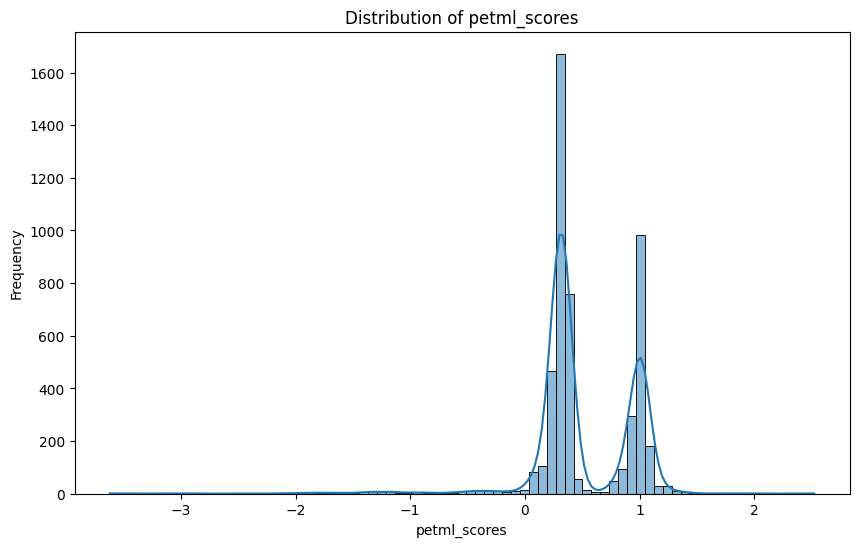

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['petml_scores'], kde=True)
plt.title('Distribution of petml_scores')
plt.xlabel('petml_scores')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# /content/drive/MyDrive/SynBio Software/data/processed/netsolp_chunks

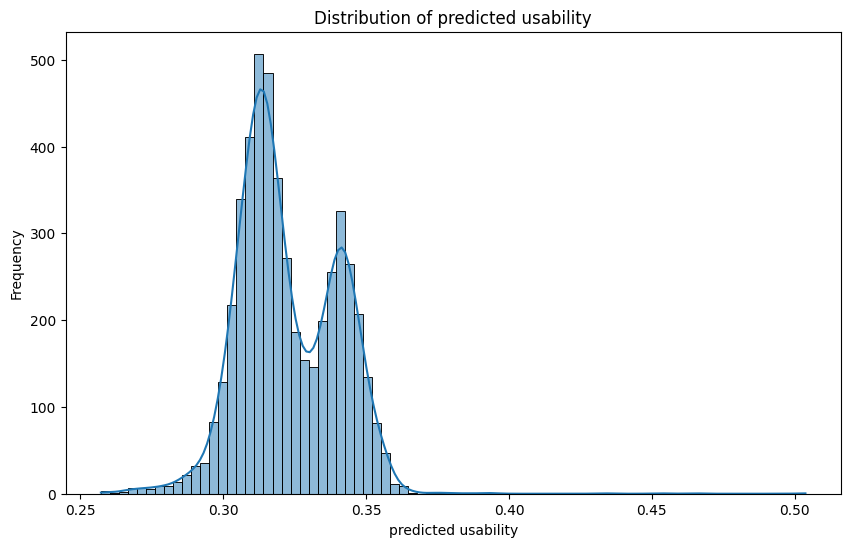

In [ ]:


plt.figure(figsize=(10, 6))
sns.histplot(netsolp_df['predicted_usability'], kde=True)
plt.title('Distribution of predicted usability')
plt.xlabel('predicted usability')
plt.ylabel('Frequency')
plt.show()

In [ ]:
reference_fasta = netsolp_df_renamed['fasta'].iloc[0]

def count_diff_chars(row_fasta, ref_fasta):
    if len(row_fasta) != len(ref_fasta):
        # Handle cases where lengths might differ, though typically they should be same for comparison
        return -1 # Or raise an error, or handle as appropriate
    diff_count = 0
    for i in range(len(ref_fasta)):
        if row_fasta[i] != ref_fasta[i]:
            diff_count += 1
    return diff_count

netsolp_df_renamed['num_diff_chars'] = netsolp_df_renamed['fasta'].apply(lambda x: count_diff_chars(x, reference_fasta))
display(netsolp_df_renamed.head())

,seq_id,fasta,predicted_usability,num_diff_chars
0,seq_0,AADNPYQRGPDPTNASIEAATGPFAAGTQPIVGASGFGGGQIYYPT...,0.350295,0
1,seq_1,AADNPYQRGPDPTNASIEAATGPFACGTQPIVGASGFGGGQIYYPT...,0.333243,1
2,seq_2,AADNPYQRGPDPTNASIEAATGPFADGTQPIVGASGFGGGQIYYPT...,0.329281,1
3,seq_3,AADNPYQRGPDPTNASIEAATGPFAEGTQPIVGASGFGGGQIYYPT...,0.345326,1
4,seq_4,AADNPYQRGPDPTNASIEAATGPFAFGTQPIVGASGFGGGQIYYPT...,0.342147,1


In [ ]:
highest_num_diff_chars = netsolp_df_renamed['num_diff_chars'].max()
print(f"The highest number for 'num_diff_chars' is: {highest_num_diff_chars}")

The highest number for 'num_diff_chars' is: 246


In [ ]:
# get highest number for `num_diff_chars` in  netsolp_df_renamed

In [ ]:
merged_df

,seq_id,petml_scores,predicted_usability
0,seq_4678,2.521780,0.300048
1,seq_4679,1.899036,0.267333
2,seq_4698,1.791939,0.259740
3,seq_4940,1.697583,0.303686
4,seq_4738,1.455831,0.311094
...,...,...,...
4983,seq_4842,-2.972539,0.306663
4984,seq_4841,-2.987106,0.303463
4985,seq_4776,-3.179706,0.258522
4986,seq_4907,-3.502414,0.334578


In [ ]:
netsolp_df_renamed

,seq_id,fasta,predicted_usability,num_diff_chars
0,seq_0,AADNPYQRGPDPTNASIEAATGPFAAGTQPIVGASGFGGGQIYYPT...,0.350295,0
1,seq_1,AADNPYQRGPDPTNASIEAATGPFACGTQPIVGASGFGGGQIYYPT...,0.333243,1
2,seq_2,AADNPYQRGPDPTNASIEAATGPFADGTQPIVGASGFGGGQIYYPT...,0.329281,1
3,seq_3,AADNPYQRGPDPTNASIEAATGPFAEGTQPIVGASGFGGGQIYYPT...,0.345326,1
4,seq_4,AADNPYQRGPDPTNASIEAATGPFAFGTQPIVGASGFGGGQIYYPT...,0.342147,1
...,...,...,...,...
4983,seq_4983,SNITGNGSFSVSTYNISSLVTGFGGGVAYYPSTAGRYPVVAVSPGF...,0.267762,-1
4984,seq_4984,ASLKSRSGPFNVDRFSVSGYLKGFGDSTVYYPTNATGKMGAIAVIP...,0.326308,-1
4985,seq_4985,MGVRYPEQGGFGGVAAVPGYNSAEKAVAWLGPRLASQGFVVITIAT...,0.273596,-1
4986,seq_4986,RALLEAPRGPLATARTVVPRAEAAGYGGGTIYHPAEMRTGETYGAV...,0.273759,-1


In [ ]:
netsolp_df_renamed = pd.merge(netsolp_df_renamed, df[['seq_id', 'petml_scores']], on='seq_id', how='left')
display(netsolp_df_renamed.head())

,seq_id,fasta,predicted_usability,num_diff_chars,petml_scores
0,seq_0,AADNPYQRGPDPTNASIEAATGPFAAGTQPIVGASGFGGGQIYYPT...,0.350295,0,0.290674
1,seq_1,AADNPYQRGPDPTNASIEAATGPFACGTQPIVGASGFGGGQIYYPT...,0.333243,1,0.290594
2,seq_2,AADNPYQRGPDPTNASIEAATGPFADGTQPIVGASGFGGGQIYYPT...,0.329281,1,0.262703
3,seq_3,AADNPYQRGPDPTNASIEAATGPFAEGTQPIVGASGFGGGQIYYPT...,0.345326,1,0.269589
4,seq_4,AADNPYQRGPDPTNASIEAATGPFAFGTQPIVGASGFGGGQIYYPT...,0.342147,1,0.290507


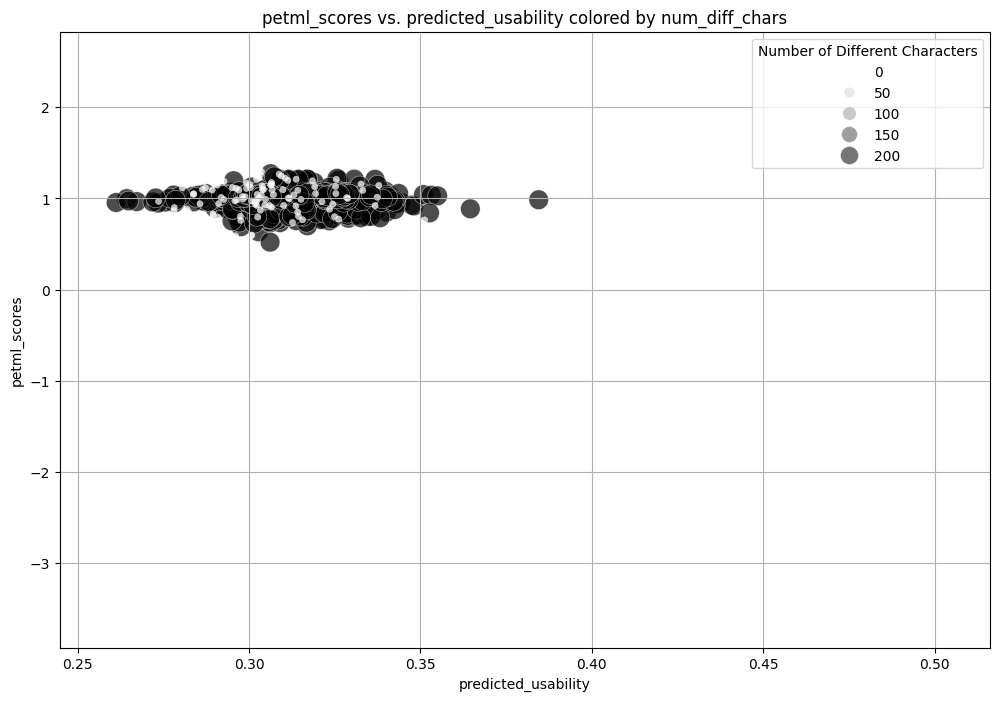

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='predicted_usability',
    y='petml_scores',
    hue='num_diff_chars',
    data=netsolp_df_renamed,
    palette='Greys', # 'Greys' palette goes from light to dark
    size='num_diff_chars', # Use size to further emphasize differences
    sizes=(20, 200), # Range of marker sizes
    alpha=0.7
)
plt.title('petml_scores vs. predicted_usability colored by num_diff_chars')
plt.xlabel('predicted_usability')
plt.ylabel('petml_scores')
plt.grid(True)
plt.legend(title='Number of Different Characters')
plt.show()

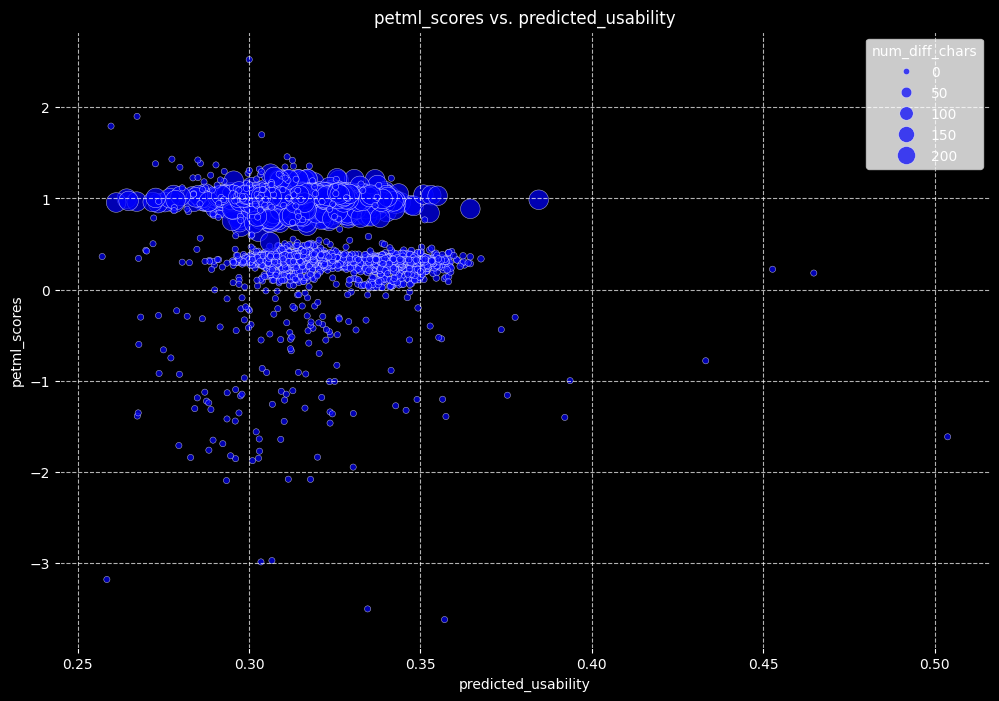

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8), facecolor='black') # Set figure background to black
ax = plt.gca()
ax.set_facecolor('black') # Set axes background to black

sns.scatterplot(
    x='predicted_usability',
    y='petml_scores',
    data=netsolp_df_renamed,
    color='blue', # Set points color to blue
    size='num_diff_chars', # Keep size mapping
    sizes=(20, 200),
    alpha=0.7
)
plt.title('petml_scores vs. predicted_usability', color='white') # Set title color to white
plt.xlabel('predicted_usability', color='white') # Set xlabel color to white
plt.ylabel('petml_scores', color='white') # Set ylabel color to white
plt.grid(True, color='white', linestyle='--', alpha=0.7) # Set grid color to white

# Set tick label colors to white
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# Adjust legend for size, if automatically generated
# If a legend for 'size' is automatically generated, we need to set its text color.
# seaborn scatterplot often generates size legend. Find it and set its colors.
legend = ax.get_legend()
if legend:
    plt.setp(legend.get_texts(), color='white') # Set legend text color to white
    plt.setp(legend.get_title(), color='white') # Set legend title color to white

plt.show()